##### Import Libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns5

# Pie Chart

# Visualisasi Pie chart

## Histogram

##### link dataset : https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset

In [7]:
# memuat data
path="motorsycle_salels.csv"
dms = pd.read_csv(path)
dms.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


##### Melakukan plot beberapa group

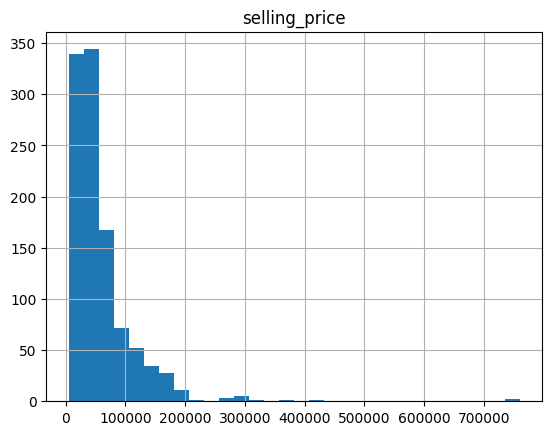

In [18]:
dms.hist(column='selling_price', bins=30);

##### melakukan plot beberapa grup

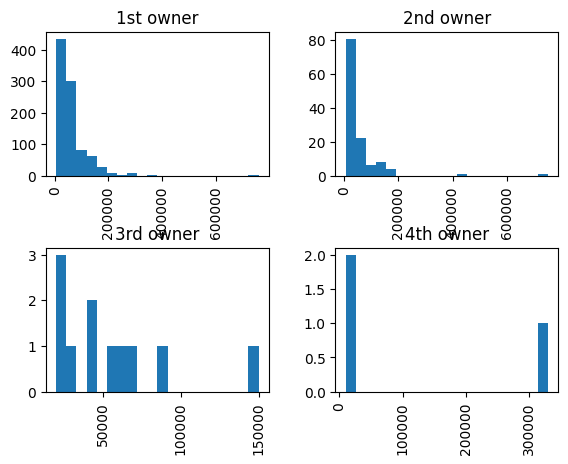

In [20]:
dms.hist(column='selling_price', by='owner', bins=20);

##### melakukan plot pada beberapa seri

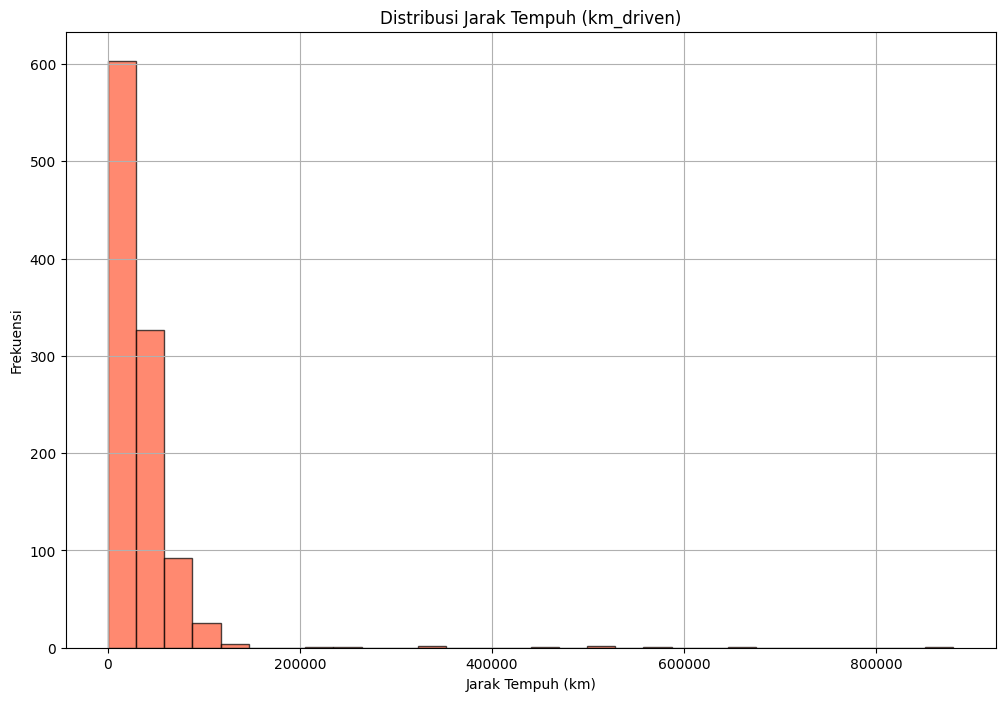

In [23]:
dms['km_driven'].plot(kind='hist',
                     bins=30,
                     alpha=0.7,
                     title='Distribusi Jarak Tempuh (km_driven)',
                     grid=True,
                     figsize=(12, 8),
                     color='#FF5733',
                     edgecolor='black')
plt.xlabel('Jarak Tempuh (km)')
plt.ylabel('Frekuensi')
plt.show()

# Correlation dan Causation

##### import libary scipy

In [22]:
from scipy import stats

##### menghitung kofiensi korelasi dari 'km_driven' & 'selling_price'

In [24]:
pearson_coef, p_value = stats.pearsonr(dms['km_driven'], dms['selling_price'])
print(f"Koefisien Korelasi Pearson: {pearson_coef:.4f}")
print(f"Nilai P-value: {p_value:.4f}")

Koefisien Korelasi Pearson: -0.2129
Nilai P-value: 0.0000


##### menghitung koefisien korelasi pearson dari 'year' & 'selling_price'

In [27]:
pearson_coef, p_value = stats.pearsonr(dms['year'], dms['selling_price'])
print(f"Koefisien Korelasi Pearson (year vs selling_price): {pearson_coef:.4f}")
print(f"Nilai P-value: {p_value:.4f}")

Koefisien Korelasi Pearson (year vs selling_price): 0.4022
Nilai P-value: 0.0000


##### Daftar tipe data setiap kolom

print(dms.dtypes)

##### visualisasi scatter plot menggunakan regplot untuk mengetahui hubungan korelasi variabel 'km_driven' & 'selling_price'

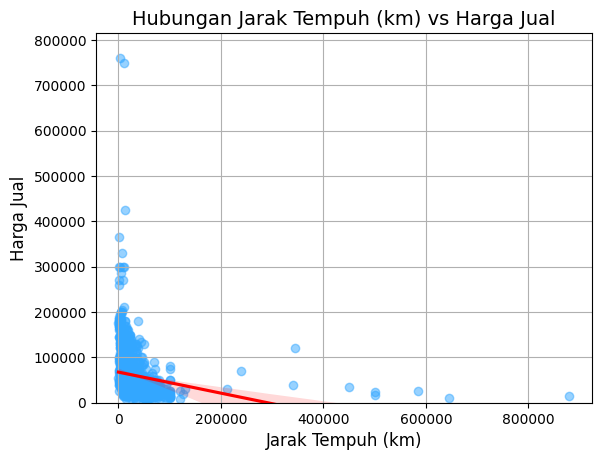

In [29]:
sns.regplot(x="km_driven", y="selling_price", data=dms, 
            scatter_kws={'alpha':0.5, 'color':'#33A7FF'}, 
            line_kws={'color':'red'})
plt.title("Hubungan Jarak Tempuh (km) vs Harga Jual", fontsize=14)
plt.xlabel("Jarak Tempuh (km)", fontsize=12)
plt.ylabel("Harga Jual", fontsize=12)
plt.ylim(0,)
plt.grid(True)
plt.show()

##### Menetahui korelasi 'year' & 'selling_price'

In [33]:
dms[["year", "selling_price"]].corr()

,year,selling_price
year,1.000000,0.402188
selling_price,0.402188,1.000000


##### visualisasi scatter plot menggunakan regplot untuk mengetahui hubungan korelasi variabel 'selling_price' & 'ex_showroom_price'

<Axes: xlabel='selling_price', ylabel='ex_showroom_price'>

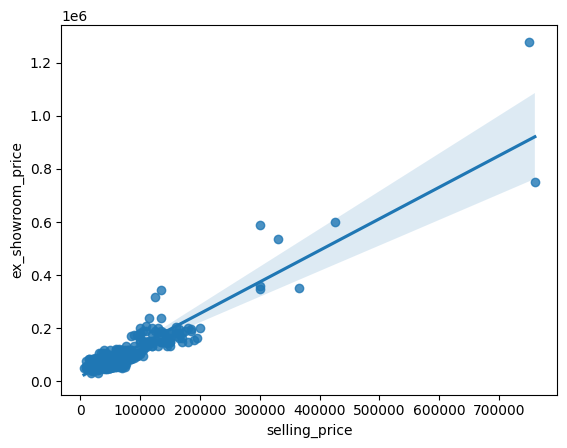

In [32]:
sns.regplot(x="selling_price", y="ex_showroom_price", data=dms)

# Visualisasi Desktiptif Statistik 

In [40]:
dms.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


##### melakukan decribe data terhadap variable bertipe object

In [41]:
dms.describe(include=['object'])

,name,seller_type,owner
count,1061,1061,1061
unique,279,2,4
top,Bajaj Pulsar 150,Individual,1st owner
freq,41,1055,924


In [43]:
# menghitung nilai pada 'seller_type'
dms['seller_type'].value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

##### Konfersi series ke dataframe

In [44]:
dms['seller_type'].value_counts().to_frame()

,count
seller_type,
Individual,1055
Dealer,6


##### membuat dataframe baru dengan nama "seller_type_counts"

In [48]:
seller_type_counts = dms['seller_type'].value_counts().to_frame()

##### mengganti nama "seller_type_counts" menjadi "value_counts"

In [49]:
seller_type_counts.rename(columns={'seller_type': 'value_counts'}, inplace=True)
seller_type_counts

,count
seller_type,
Individual,1055
Dealer,6


# Grouping

##### Menampilkan Nilai Untuk data series

In [65]:
dms['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

##### membuat dataframe baru dengna kolom 'seller_type','name', dan 'selling_price'

In [66]:
dms_group_one = dms[['seller_type', 'name', 'selling_price']]

##### Melakukan grouping

In [67]:
dms_group_one = dms_group_one.groupby(['seller_type'], as_index=False)['selling_price'].mean()

In [68]:
dms_group_two

,seller_type,name,selling_price
0,Dealer,Bajaj Pulsar 180,72000.000000
1,Dealer,Bajaj Pulsar NS200,50000.000000
2,Dealer,Hero Glamour 125,38000.000000
3,Dealer,Hero Honda CD100,15000.000000
4,Dealer,Hero Honda Passion Plus,25000.000000
...,...,...,...
280,Individual,Yamaha YZF R15 S,70833.333333
281,Individual,Yamaha YZF R15 V3,145000.000000
282,Individual,Yamaha YZF R15 [2011-2018],64000.000000
283,Individual,Yamaha YZF R3,365000.000000


##### melakukan grouping

In [76]:
dms_gptest = dms[['seller_type','km_driven','selling_price']]

In [77]:
grouped_test1 = dms_gptest.groupby(['seller_type','selling_price'],as_index=False).mean()

In [78]:
grouped_test1

,seller_type,selling_price,km_driven
0,Dealer,15000,10000.0
1,Dealer,25000,100000.0
2,Dealer,38000,5500.0
3,Dealer,50000,58203.0
4,Dealer,72000,7850.0
...,...,...,...
131,Individual,330000,6500.0
132,Individual,365000,1127.0
133,Individual,425000,13600.0
134,Individual,750000,12000.0


##### Melakukan pivot data

In [87]:
grouped_pivot = grouped_test1.pivot(index='seller_type',columns='selling_price')

In [88]:
grouped_pivot

km_driven                                                    \
selling_price    5000     6000     7500     8000     9000          10000    
seller_type                                                                 
Dealer              NaN      NaN      NaN      NaN      NaN           NaN   
Individual      60000.0  35000.0  68000.0  64500.0  66191.0  99215.533333   

                                                        ...                  \
selling_price        12000    14000    14500    14700   ...  260000  270000   
seller_type                                             ...                   
Dealer                  NaN      NaN      NaN      NaN  ...     NaN     NaN   
Individual     71166.666667  66000.0  44000.0  30000.0  ...  1200.0  5690.0   

                                                                         \
selling_price  285000  299000  300000  330000  365000   425000   750000   
seller_type                                                               
Dealer            NaN     NaN     NaN     NaN     NaN      NaN      NaN   
Individual     5500.0  1500.0  8100.0  6500.0  1127.0  13600.0  12000.0   

                       
selling_price  760000  
seller_type            
Dealer            NaN  
Individual     2800.0  

[2 rows x 130 columns]

##### melakukan pivot data dengan handle missing value dengan nilai 0

In [89]:
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

km_driven                                                    \
selling_price    5000     6000     7500     8000     9000          10000    
seller_type                                                                 
Dealer              0.0      0.0      0.0      0.0      0.0      0.000000   
Individual      60000.0  35000.0  68000.0  64500.0  66191.0  99215.533333   

                                                        ...                  \
selling_price        12000    14000    14500    14700   ...  260000  270000   
seller_type                                             ...                   
Dealer             0.000000      0.0      0.0      0.0  ...     0.0     0.0   
Individual     71166.666667  66000.0  44000.0  30000.0  ...  1200.0  5690.0   

                                                                         \
selling_price  285000  299000  300000  330000  365000   425000   750000   
seller_type                                                               
Dealer            0.0     0.0     0.0     0.0     0.0      0.0      0.0   
Individual     5500.0  1500.0  8100.0  6500.0  1127.0  13600.0  12000.0   

                       
selling_price  760000  
seller_type            
Dealer            0.0  
Individual     2800.0  

[2 rows x 130 columns]

##### melakukan grouping dari  "body-style" berdasarkan rata-rata "harga"

In [90]:
dms_gptest2 = dms[['km_driven','selling_price']]
grouped_test_kmh = dms_gptest2.groupby(['km_driven'],as_index= False).mean()
grouped_test_kmh

,km_driven,selling_price
0,350,175000.000000
1,380,55000.000000
2,500,120500.000000
3,1000,69333.333333
4,1127,365000.000000
...,...,...
299,450000,35000.000000
300,500000,19994.500000
301,585659,25000.000000
302,646000,10000.000000


##### Visualisasi heatmap

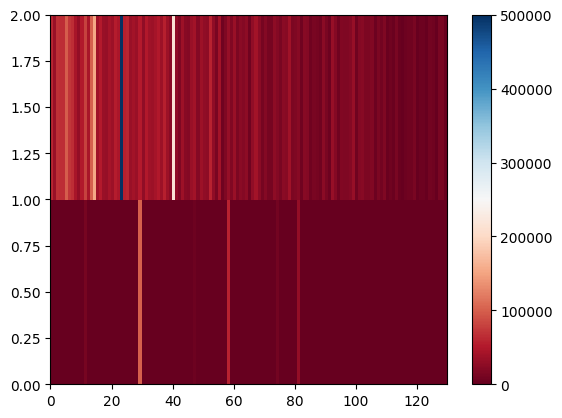

In [91]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()